In [155]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data= "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, on="city")
combined_df=combined_df.sort_values(by='type')

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
2374,South Saramouth,7,Rural,2018-04-12 18:11:50,57.23,5081198789583
2282,Michaelberg,6,Rural,2018-01-11 04:39:27,16.42,8800556719157
2283,Michaelberg,6,Rural,2018-04-22 17:28:52,19.27,26848733115
2284,Michaelberg,6,Rural,2018-05-02 11:57:42,52.71,5649532113861
2285,Michaelberg,6,Rural,2018-01-19 12:38:07,38.68,103217578833


## Bubble Plot of Ride Sharing Data

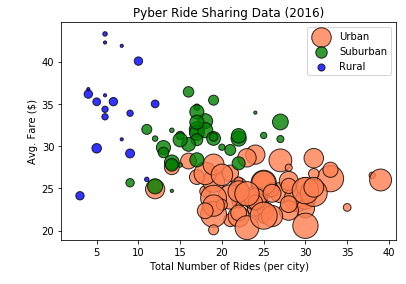

In [157]:
# Obtain the x and y coordinates for each of the three city types
#cities
urban_cities = combined_df[combined_df["type"] == "Urban"]
suburban_cities = combined_df[combined_df["type"] == "Suburban"]
rural_cities = combined_df[combined_df["type"] == "Rural"]

#ride count
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]

#avg fare
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]

#driver count
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

#Build the scatter plots for each city types
urban=plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")
suburban=plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")
rural=plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Avg. Fare ($)")
# Create a legend
plt.legend(handles=[urban, suburban, rural], loc="best")

# Incorporate a text label regarding circle size
#plt.figtext("Note: Circle size correlates with driver count per city.")
plt.annotate('Note: Circle size correlates with driver count per city.', xy=(5, 5), xytext=(2.9, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
# Save Figure
plt.savefig("../Images/PyberRideScatter.png")
plt.show()

In [158]:
# Show plot
plt.show()

## Total Fares by City Type

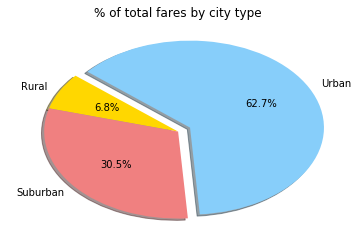

In [214]:
# Calculate Type Percents
type_percents = 100 * combined_df.groupby(["type"]).sum()["fare"] / combined_df["fare"].sum()
type_percents
# Build Pie Chart
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.1, )
labels=["Rural","Suburban", "Urban"]
plt.pie(type_percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of total fares by city type")

# Save Figure
plt.savefig("../Images/FaresPie.png")
plt.show()

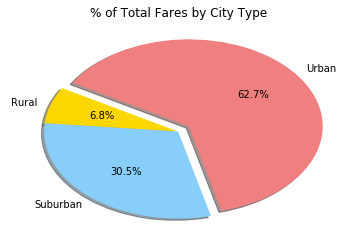

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

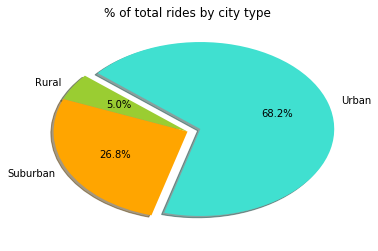

In [215]:
# Calculate Ride Percents
ride_percents = 100 * combined_df.groupby(["type"]).sum()["ride_id"] / combined_df["ride_id"].sum()
ride_percents
# Build Pie Chart
colors = ["yellowgreen", "orange", "turquoise"]
explode = (0, 0, 0.1, )
labels=["Rural","Suburban", "Urban"]
plt.pie(ride_percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of total rides by city type")

# Save Figure
plt.savefig("../Images/RidesPie.png")
plt.show()

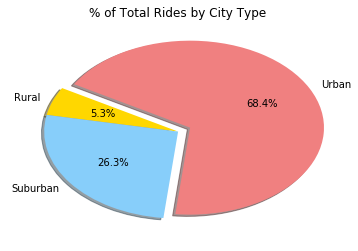

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

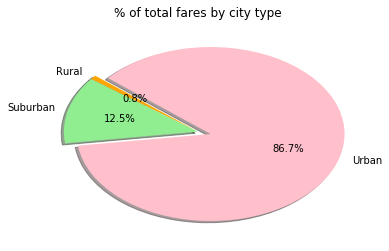

In [216]:
# Calculate Driver Percents
driver_percents = 100 * combined_df.groupby(["type"]).sum()["driver_count"] / combined_df["driver_count"].sum()
driver_percents
# Build Pie Charts
colors = ["orange", "lightgreen", "pink"]
explode = (0, 0, 0.1, )
labels=["Rural","Suburban", "Urban"]
plt.pie(driver_percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of total fares by city type")

# Save Figure
plt.savefig("../Images/DriversPie.png")
plt.show()
# Save Figure


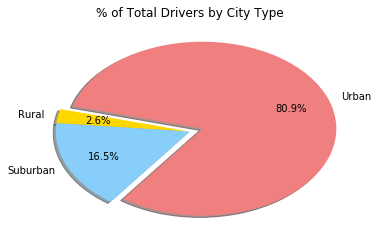

In [6]:
# Show Figure
plt.show()